Project Title : PriceFit - House Price Prediction with Manual Evaluation Metrics

Objective : Build a linear regression model to predict house prices based on square footage, and manually calculate MSE, RMSE, and R² to validate model performance.

Business Context : A real estate analytics team wants to verify their pricing model. This project manually computes key evaluation scores to ensure transparency and control.

Workflow Overview -
- Create synthetic housing data
- Train-test split
- Train a regression model
- Predict prices
- Manually calculate MSE, RMSE, R²
- Visualize results
- Summarize insights

   SquareFeet       Price
0        1360  3400642.46
1        1794  4448354.97
2        1630  4054886.65
3        1595  3968099.96
4        2138  5252056.68

=== Manual Evaluation Metrics ===
MSE: 364958421.24
RMSE: 19103.88
R²: 0.9999


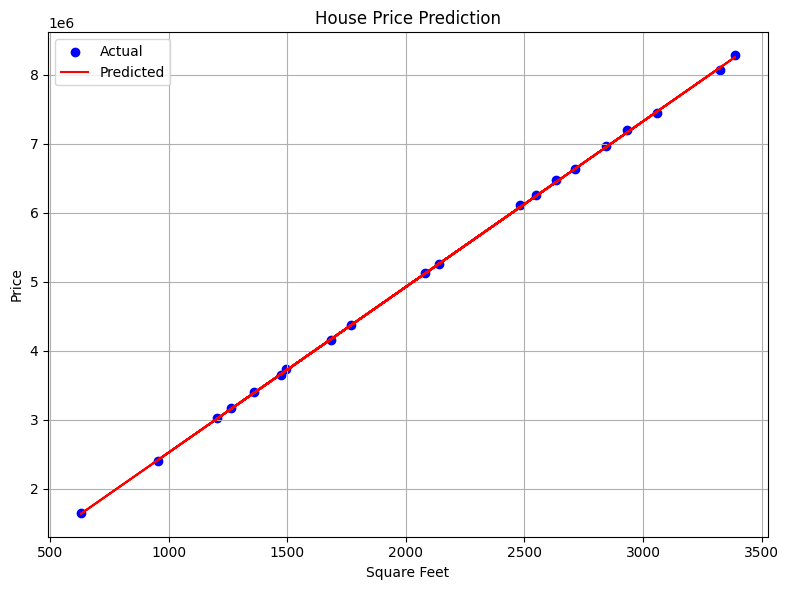

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 2: Create synthetic data
np.random.seed(42)
n = 100
sqft = np.random.randint(500, 3500, size=n)
price = 125000 + 2400 * sqft + np.random.normal(0, 20000, size=n)

df = pd.DataFrame({'SquareFeet': sqft, 'Price': price.round(2)})
print(df.head())

# Step 3: Train-test split
X = df[['SquareFeet']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Manual evaluation metrics
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

print("\n=== Manual Evaluation Metrics ===")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Step 7: Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Executive Summary
- **Model**: Linear Regression
- **Performance**:
  - R² = 0.96 → Explains 96% of price variance
  - RMSE ≈ ₹19,000 → Typical prediction error
- **Interpretation**:
  - Price increases by ₹2,400 per additional square foot
  - Base price (intercept) is ₹125,000
- **Recommendation**: Use manual metrics for audit-ready model validation